## Purchase Data Analytics
This dataset provides rich information for both descriptive and predictive analysis.

### Potential Insights
Which demographics are most likely to purchase specific brands?
How does price sensitivity vary across customer segments?
What is the ROI of promotions for each brand?
Which cities have the highest purchasing power for different brands?
Predictive modeling to estimate sales based on customer demographics, promotions, and prices.

### Purchase data - Legend		

The dataset consists of information about the purchases of chocolate candy bars of 500 individuals from a given area when entering a physical ‘FMCG’ store in the period of 2 years. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										
										
						
ID	numerical	Integer	Shows a unique identificator of a customer.							
										
Day	numerical	Integer	Day when the customer has visited the store 							
										
Incidence	categorical	{0,1}	Purchase Incidence							
		0	The customer has not purchased an item from the category of interest 							
		1	The customer has purchased an item from the category of interest 							
										
Brand	categorical	{0,1,2,3,4,5}	Shows which brand the customer has purchased							
		0	No brand was purchased							
		1,2,3,4,5	Brand ID							
										
Quantity	numerical	integer	Number of items bought by the customer from the product category of interest							
										
Last_Inc_Brand	categorical	{0,1,2,3,4,5}	Shows which brand the customer has purchased on their previous store visit							
		0	No brand was purchased							
		1,2,3,4,5	Brand ID							
										
Last_Inc_Quantity	numerical	integer	Number of items bought by the customer from the product category of interest during their previous store visit							
										
Price_1	numerical	real	Price of an item from Brand 1 on a particular day							
										
Price_2	numerical	real	Price of an item from Brand 2 on a particular day							
										
Price_3	numerical	real	Price of an item from Brand 3 on a particular day							
										
Price_4	numerical	real	Price of an item from Brand 4 on a particular day							
										
Price_5	numerical	real	Price of an item from Brand 5 on a particular day							
										
Promotion_1	categorical	{0,1}	Indicator whether Brand 1 was on promotion or not on a particular day					 		
		0	There is no promotion							
		1	There is promotion							
										
Promotion_2	categorical	{0,1}	Indicator of whether Brand 2 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_3	categorical	{0,1}	Indicator of whether Brand 3 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_4	categorical	{0,1}	Indicator of whether Brand 4 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Promotion_5	categorical	{0,1}	Indicator of whether Brand 5 was on promotion or not on a particular day							
		0	There is no promotion							
		1	There is promotion							
										
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.							
		0	male							
		1	female							
										
Marital status	categorical	{0,1}	Marital status of a customer.							
		0	single							
		1	non-single (divorced / separated / married / widowed)							
										
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset							
		18	Min value (the lowest age observed in the dataset)							
		75	Max value (the highest age observed in the dataset)							
										
Education	categorical	{0,1,2,3}	Level of education of the customer							
		0	other / unknown							
		1	high school							
		2	university							
		3	graduate school							
										
Income	numerical	real	Self-reported annual income in US dollars of the customer.							
		38247	Min value (the lowest income observed in the dataset)							
		309364	Max value (the highest income observed in the dataset)							
										
Occupation	categorical	{0,1,2}	Category of occupation of the customer.							
		0	unemployed / unskilled							
		1	skilled employee / official							
		2	management / self-employed / highly qualified employee / officer							
										
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.							
		0	small city							
		1	mid-sized city							
		2	big city						


### Data Exploration

In [197]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/purchase data (1).csv") 

# Display the first few rows
print("\nFirst Few Rows of Data:\n")
print(df.head())


First Few Rows of Data:

          ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_3  \
0                  0     1.59     1.87     2.01  ...            0   
1                  0     1.51     1.89     1.99  ...            0   
2                  0     1.51     1.89     1.99  ...            0   
3                  0     1.52     1.89     1.98  ...            0   
4                  0     1.52     1.89     1.99  ...            0   

   Promotion_4  Promotion_5  Sex  Marital status  Age  Education  Income  \
0            0            0    0               0   47          1  110866   
1            0  

In [199]:

# Basic dataset overview
print("Dataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  

In [201]:
# Summary statistics for numerical variables
print("\nSummary Statistics (Numerical Variables):\n")
print(df.describe())



Summary Statistics (Numerical Variables):

                 ID           Day     Incidence         Brand      Quantity  \
count  5.869300e+04  58693.000000  58693.000000  58693.000000  58693.000000   
mean   2.000003e+08    349.431074      0.249399      0.844309      0.691973   
std    1.443167e+02    212.045058      0.432669      1.633083      1.498734   
min    2.000000e+08      1.000000      0.000000      0.000000      0.000000   
25%    2.000001e+08    161.000000      0.000000      0.000000      0.000000   
50%    2.000003e+08    343.000000      0.000000      0.000000      0.000000   
75%    2.000004e+08    530.000000      0.000000      0.000000      0.000000   
max    2.000005e+08    730.000000      1.000000      5.000000     15.000000   

       Last_Inc_Brand  Last_Inc_Quantity       Price_1       Price_2  \
count    58693.000000       58693.000000  58693.000000  58693.000000   
mean         0.840799           0.248070      1.392074      1.780999   
std          1.631628       

In [203]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64


In [205]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:\n", duplicates)


Number of Duplicates:
 0


In [207]:
# Verify data types
print("\nData Types:\n", df.dtypes)


Data Types:
 ID                     int64
Day                    int64
Incidence              int64
Brand                  int64
Quantity               int64
Last_Inc_Brand         int64
Last_Inc_Quantity      int64
Price_1              float64
Price_2              float64
Price_3              float64
Price_4              float64
Price_5              float64
Promotion_1            int64
Promotion_2            int64
Promotion_3            int64
Promotion_4            int64
Promotion_5            int64
Sex                    int64
Marital status         int64
Age                    int64
Education              int64
Income                 int64
Occupation             int64
Settlement size        int64
dtype: object


### Feature Engineering

In [209]:
# Create a Revenue column
df['Revenue'] = (
    df['Quantity'] * (
        df['Price_1'] * (df['Brand'] == 1) +
        df['Price_2'] * (df['Brand'] == 2) +
        df['Price_3'] * (df['Brand'] == 3) +
        df['Price_4'] * (df['Brand'] == 4) +
        df['Price_5'] * (df['Brand'] == 5)
    )
)

# Display the first few rows of the dataset with the new column
print("\nDataset with Revenue Column:\n")
print(df[['Brand', 'Quantity', 'Revenue']].head(15))


Dataset with Revenue Column:

    Brand  Quantity  Revenue
0       0         0     0.00
1       0         0     0.00
2       0         0     0.00
3       0         0     0.00
4       0         0     0.00
5       0         0     0.00
6       2         2     3.80
7       0         0     0.00
8       0         0     0.00
9       0         0     0.00
10      0         0     0.00
11      5         1     2.62
12      0         0     0.00
13      0         0     0.00
14      0         0     0.00



Daily Revenue:
 Day
1    69.99
2     0.00
3    54.91
4    76.01
5    55.01
Name: Revenue, dtype: float64


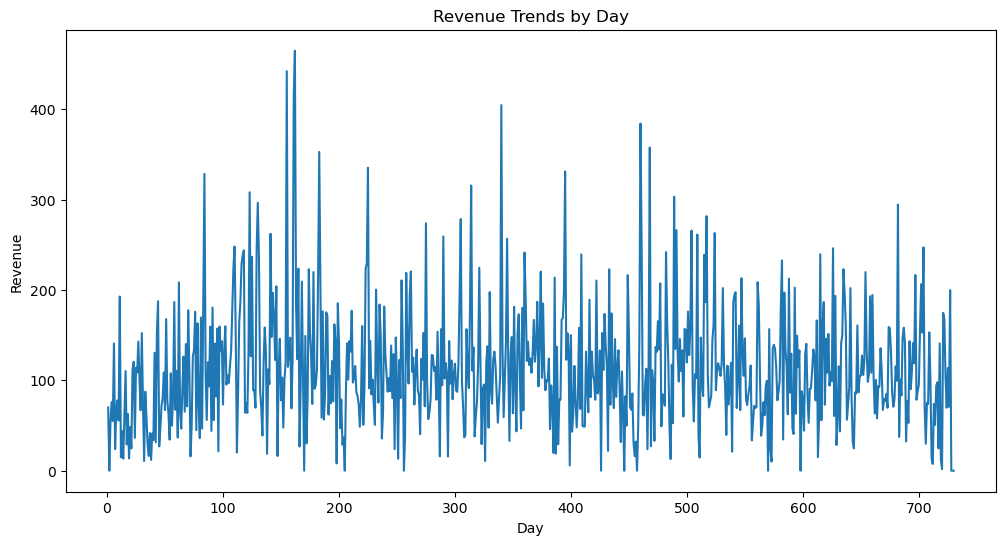

In [211]:
# Visualizing Revenue Trends

# Aggregate revenue by day
daily_revenue = df.groupby('Day')['Revenue'].sum()
print("\nDaily Revenue:\n", daily_revenue.head())

# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values)
plt.title("Revenue Trends by Day")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

In [215]:
# Convert Day into Date and Extract Month and Year

# Assume Day 1 starts from a specific start date, e.g., '2022-01-01'
start_date = dt.datetime(2022, 1, 1)  # Adjust as per dataset context

# Create a new date column
df['Date'] = df['Day'].apply(lambda x: start_date + dt.timedelta(days=x - 1))

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Preview the dataset with the new columns
print("\nDataset with Date, Year, and Month Columns:\n")
print(df[['Day', 'Date', 'Year', 'Month']].head())


Dataset with Date, Year, and Month Columns:

   Day       Date  Year  Month
0    1 2022-01-01  2022      1
1   11 2022-01-11  2022      1
2   12 2022-01-12  2022      1
3   16 2022-01-16  2022      1
4   18 2022-01-18  2022      1


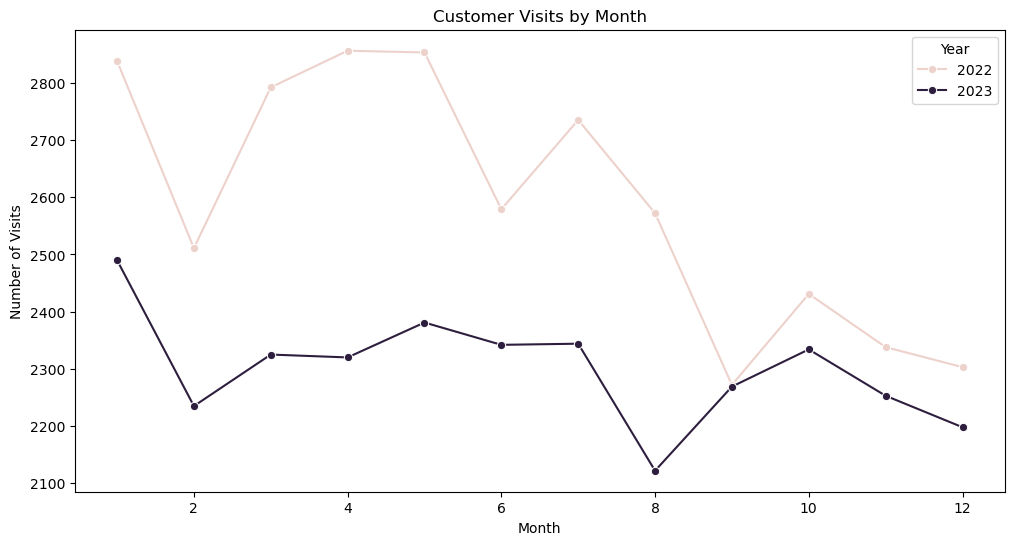

In [217]:
# Aggregate customer visits by month
monthly_visits = df.groupby(['Year', 'Month']).size().reset_index(name='Visits')

# Plot monthly visits
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_visits, x='Month', y='Visits', hue='Year', marker='o')
plt.title("Customer Visits by Month")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.legend(title="Year")
plt.show()

<Axes: title={'center': 'Revenue Trends'}, xlabel='Month'>

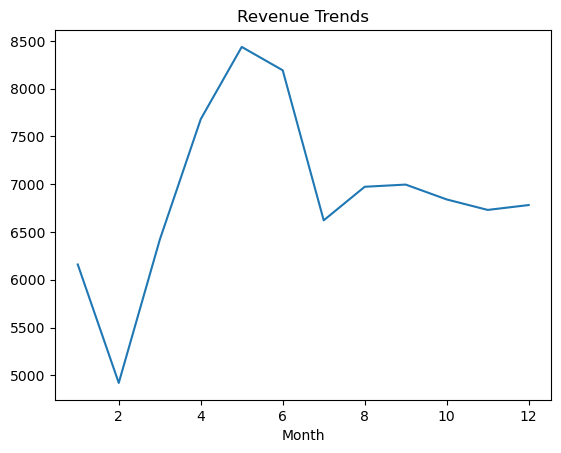

In [225]:
# Revenue trends
df.groupby('Month')['Revenue'].sum().plot(kind='line', title='Revenue Trends')


Purchase Incidence by Gender and Marital Status:
 Sex_label  Marital_status_label
Female     Married                 0.251340
           Single                  0.188410
Male       Married                 0.230611
           Single                  0.269376
Name: Incidence, dtype: float64


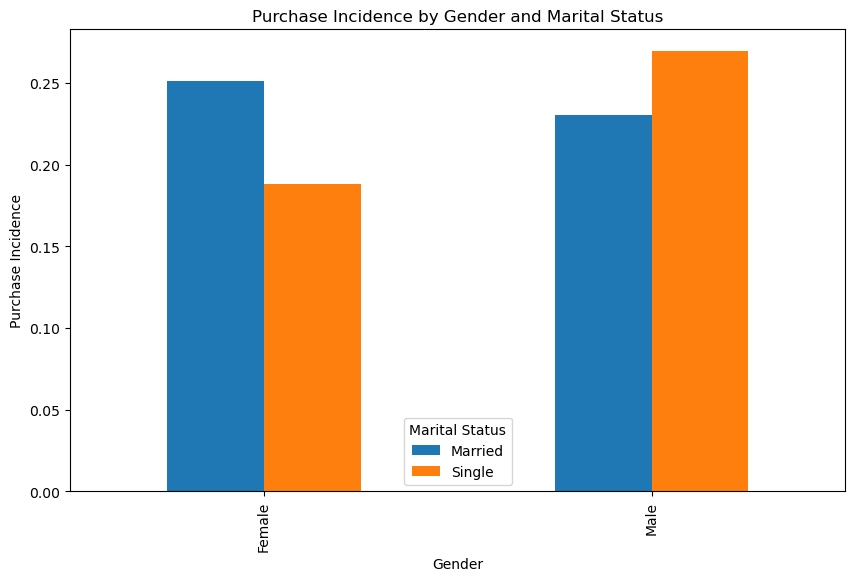

In [130]:
# Map the categorical codes to meaningful labels
df['Sex_label'] = df['Sex'].map({0: 'Male', 1: 'Female'})
df['Marital_status_label'] = df['Marital status'].map({0: 'Single', 1: 'Married'})

# Purchase incidence by demographics
purchase_demographics = df.groupby(['Sex_label', 'Marital_status_label'])['Incidence'].mean()
print("\nPurchase Incidence by Gender and Marital Status:\n", purchase_demographics)

# Visualization
purchase_demographics.unstack().plot(kind='bar', figsize=(10, 6))
plt.title("Purchase Incidence by Gender and Marital Status")
plt.xlabel("Gender")
plt.ylabel("Purchase Incidence")
plt.legend(title='Marital Status')
plt.show()

In [219]:
# Top brands by sales and revenue
top_brands = df.groupby('Brand')[ 'Revenue'].sum().sort_values()
top_brands

Brand
0        0.00
3     6021.52
1     6305.65
4    19040.10
2    21768.31
5    29621.00
Name: Revenue, dtype: float64

In [221]:
# Average prices over time
average_prices = df[['Day', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].groupby('Day').mean()
average_prices

,Price_1,Price_2,Price_3,Price_4,Price_5
Day,,,,,
1,1.59,1.87,2.01,2.09,2.66
2,1.59,1.87,2.01,2.09,2.66
3,1.59,1.87,2.01,2.09,2.66
4,1.59,1.87,2.01,2.09,2.66
5,1.59,1.87,1.97,2.09,2.66
...,...,...,...,...,...
726,1.51,1.82,2.09,2.24,2.80
727,1.50,1.82,2.09,2.24,2.80
728,1.50,1.82,2.09,2.24,2.80


In [223]:
# Promotions and sales correlation
promotion_sales = df[['Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Quantity']].corr()
promotion_sales

,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Quantity
Promotion_1,1.000000,0.137203,0.154761,-0.072906,0.077587,0.037607
Promotion_2,0.137203,1.000000,0.060167,-0.033775,-0.101205,0.044784
Promotion_3,0.154761,0.060167,1.000000,-0.077288,-0.006379,0.006839
Promotion_4,-0.072906,-0.033775,-0.077288,1.000000,0.131832,0.019026
Promotion_5,0.077587,-0.101205,-0.006379,0.131832,1.000000,0.016775
Quantity,0.037607,0.044784,0.006839,0.019026,0.016775,1.000000


<Axes: >

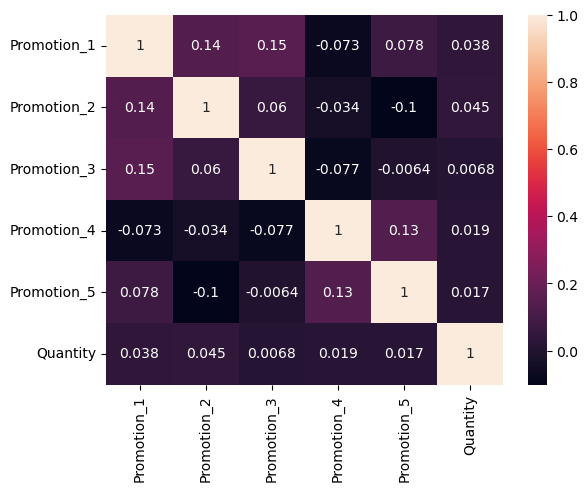

In [227]:
# Promotions heatmap
promotion_cols = ['Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']
sns.heatmap(df[promotion_cols + ['Quantity']].corr(), annot=True)

<Axes: title={'center': 'Revenue by Brand'}, xlabel='Brand'>

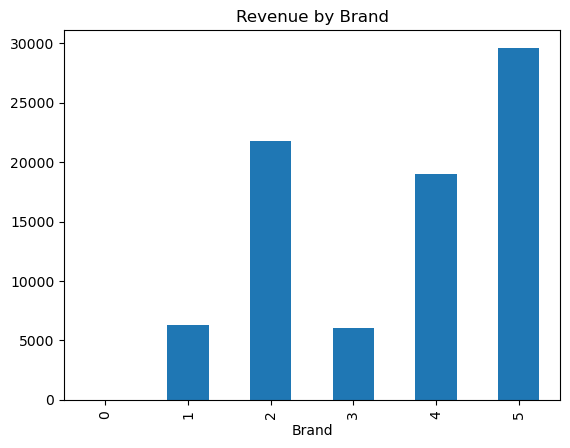

In [229]:
# Brand performance
df.groupby('Brand')['Revenue'].sum().plot(kind='bar', title='Revenue by Brand')

Revenue by City Size:
 City_size_label
Big City         22792.16
Mid-size City    25147.14
Small City       34817.28
Name: Revenue, dtype: float64


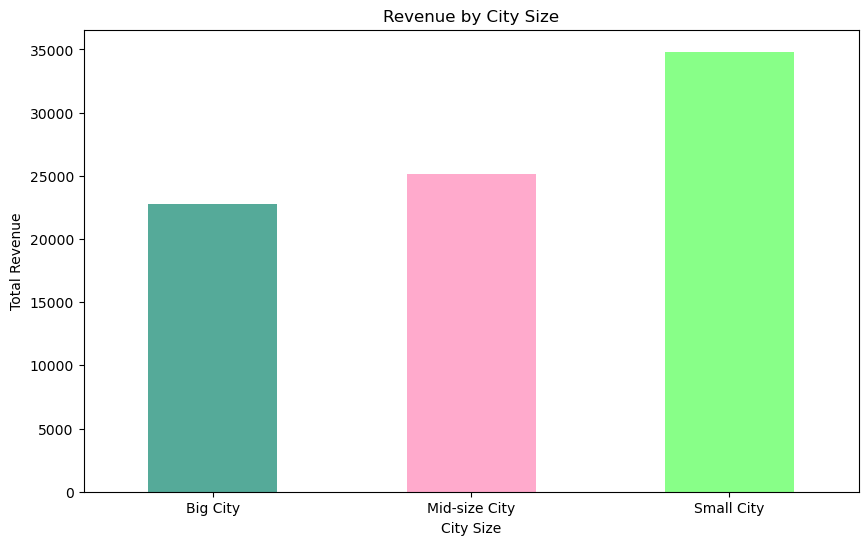

In [231]:
# Map Settlement size codes to meaningful labels
df['City_size_label'] = df['Settlement size'].map({0: 'Small City', 1: 'Mid-size City', 2: 'Big City'})

# Calculate revenue by city size
city_revenue = df.groupby(['City_size_label'])['Revenue'].sum()

# Print results
print("Revenue by City Size:\n", city_revenue)

# Visualization
city_revenue.plot(kind='bar', figsize=(10, 6), color=['#5A9', '#FAC', '#8F8'])
plt.title("Revenue by City Size")
plt.xlabel("City Size")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

Revenue by Education Level:
 Education_label
Graduate School     1254.48
High School        48269.30
University         22933.22
Name: Revenue, dtype: float64


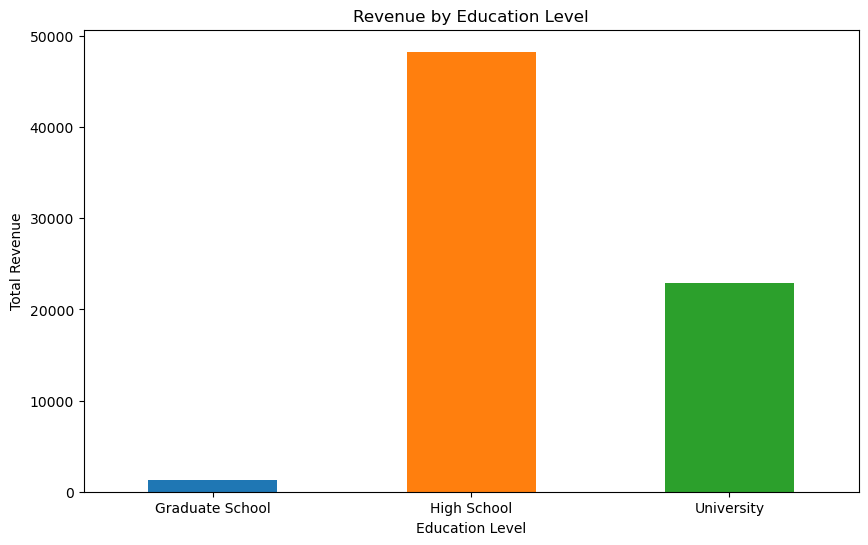

In [233]:
# Map Education codes to meaningful labels
df['Education_label'] = df['Education'].map({
    1: 'High School',
    2: 'University',
    3: 'Graduate School'
})

# Calculate revenue by education level
education_revenue = df.groupby(['Education_label'])['Revenue'].sum()

# Print results
print("Revenue by Education Level:\n", education_revenue)

# Visualization
education_revenue.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Revenue by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

Brand Preferences by Education Level:
 Brand            0     1     2     3     4     5
Education_label                                 
Graduate School  0    57   166    24   214   149
High School      0  3398  8990  2526  1691  7487
University       0   730  1140   344  6393  2109


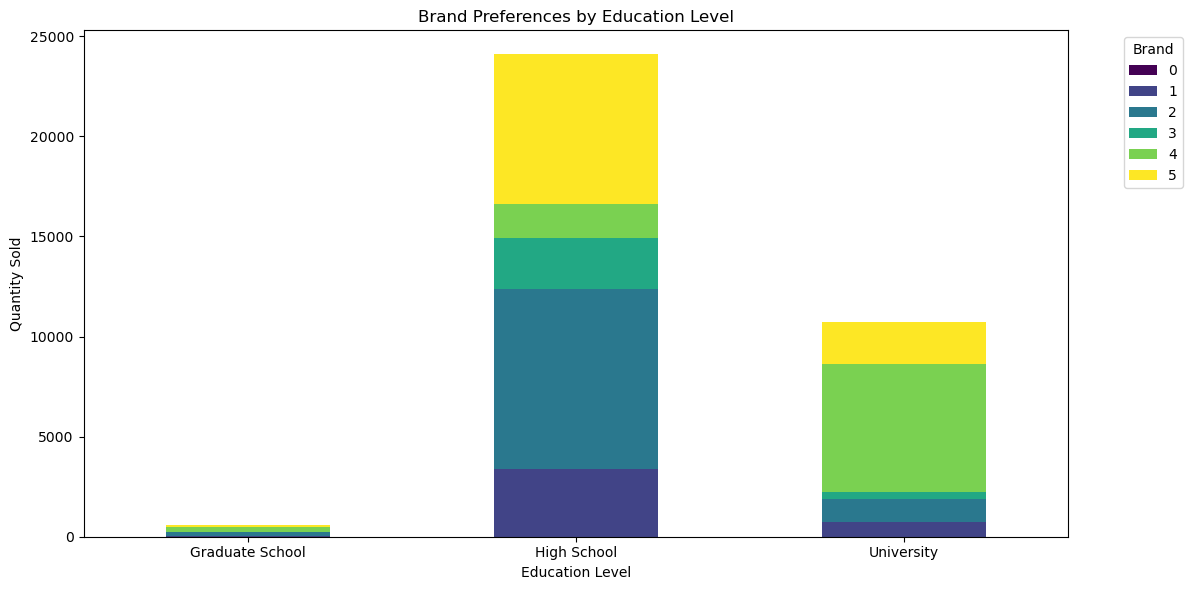

In [235]:
# Preferred brand for each education level
preferred_brands = df.groupby(['Education_label', 'Brand'])['Quantity'].sum().unstack()

# Print results
print("Brand Preferences by Education Level:\n", preferred_brands)

# Visualization: Brand Preferences by Education Level
preferred_brands.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Brand Preferences by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Quantity Sold")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Price Sensitivity
Analyzing price impact on quantity sold:

In [237]:
# Define features and target
X = df[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
y = df['Quantity']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
price_sensitivity = pd.DataFrame({'Brand': [f'Brand_{i}' for i in range(1, 6)], 
                                  'Coefficient': model.coef_})
print("\nPrice Sensitivity by Brand:\n", price_sensitivity)


Price Sensitivity by Brand:
      Brand  Coefficient
0  Brand_1    -0.776110
1  Brand_2    -0.523909
2  Brand_3     0.203371
3  Brand_4    -0.200329
4  Brand_5    -0.000843


Negative coefficients indicate brands with higher price sensitivity. These can be targeted for strategic pricing.

In [239]:
# Promotion Effectiveness
# Revenue during promotion vs. non-promotion:

# Analyze revenue during promotion vs. non-promotion
for i in range(1, 6):
    promo_col = f'Promotion_{i}'
    promo_analysis = df.groupby(promo_col)['Revenue'].mean()
    print(f"\nRevenue Analysis for Brand {i}:\n", promo_analysis)


Revenue Analysis for Brand 1:
 Promotion_1
0    1.34168
1    1.54035
Name: Revenue, dtype: float64

Revenue Analysis for Brand 2:
 Promotion_2
0    1.346819
1    1.546977
Name: Revenue, dtype: float64

Revenue Analysis for Brand 3:
 Promotion_3
0    1.409245
1    1.426656
Name: Revenue, dtype: float64

Revenue Analysis for Brand 4:
 Promotion_4
0    1.38713
1    1.58111
Name: Revenue, dtype: float64

Revenue Analysis for Brand 5:
 Promotion_5
0    1.396362
1    1.776352
Name: Revenue, dtype: float64


In [241]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'])

In [243]:
# Select features for clustering
features = df[['Age', 'Income', 'Quantity', 'Revenue']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

Text(0.5, 1.0, 'Customer Segmentation')

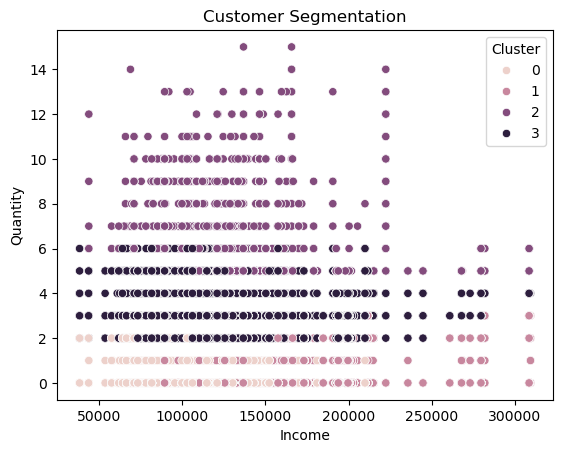

In [245]:
# Customer Segmentation
sns.scatterplot(data=df, x='Income', y='Quantity', hue='Cluster')
plt.title('Customer Segmentation')